In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [63]:
#carga dataset
data = pd.read_csv ("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
data.shape


(891, 12)

In [65]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
#verificcion de datos faltantes
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
## se identifican varios datos faltantes

In [68]:
#Metodo para rellenar las edades faltantes con la media de edades
data_rellenar_media = data.copy()
for Age in data_rellenar_media.select_dtypes(include=[np.number]).columns:
    data_rellenar_media[Age] = data_rellenar_media[Age].fillna(data_rellenar_media[Age].mean())

In [69]:
#Ya la edad no esta vacia
data_rellenar_media.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
#Rellenar con un valor constante 0
data_0 = data.fillna(0)

In [71]:
data_rellenar_media.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
# transformar datos de genero en datos numericos donde 1 es hombre y 2 es mujer
data_0['Sex'] = data_0['Sex'].replace({'male': 1, 'female': 2})

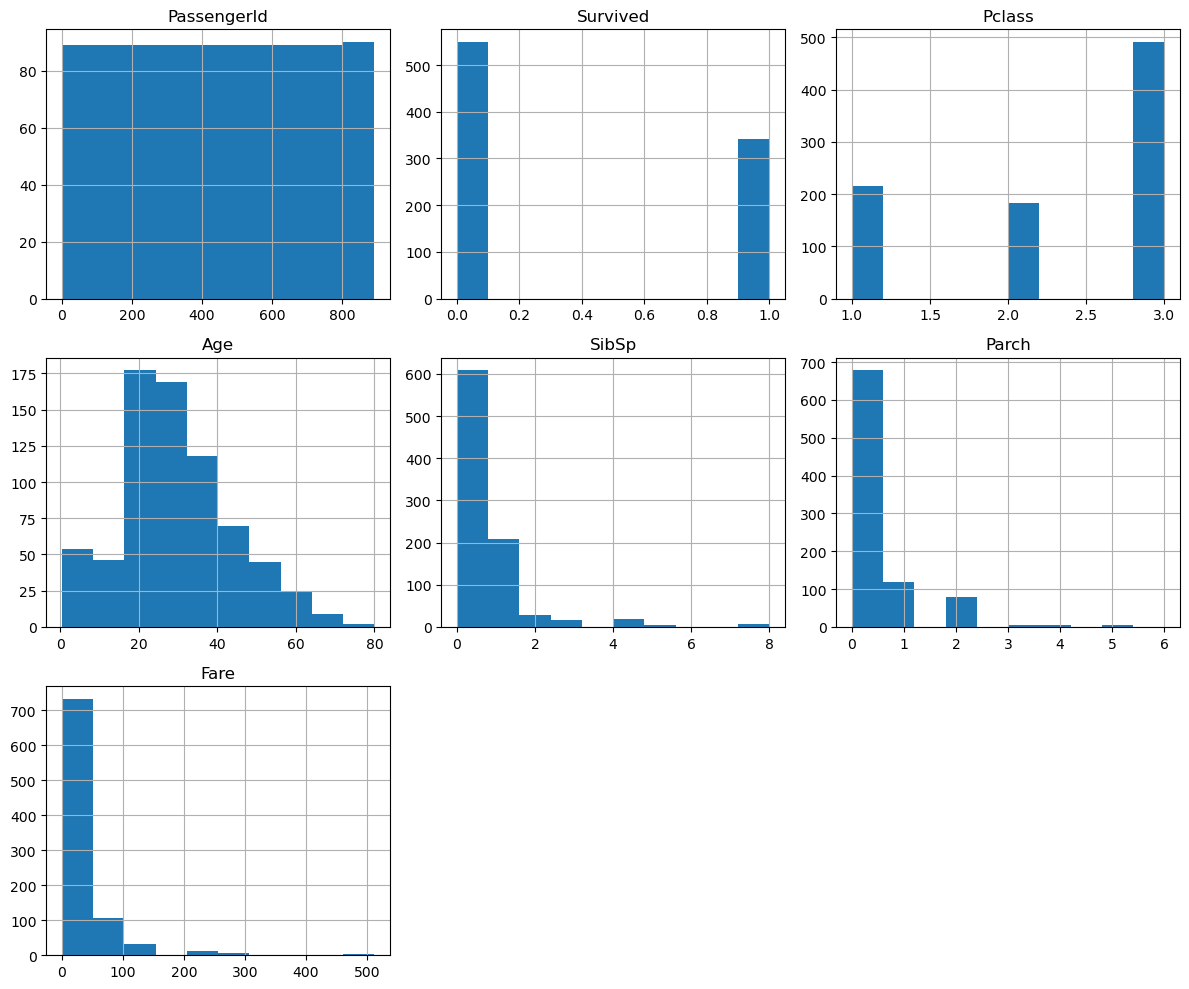

In [73]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

C:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

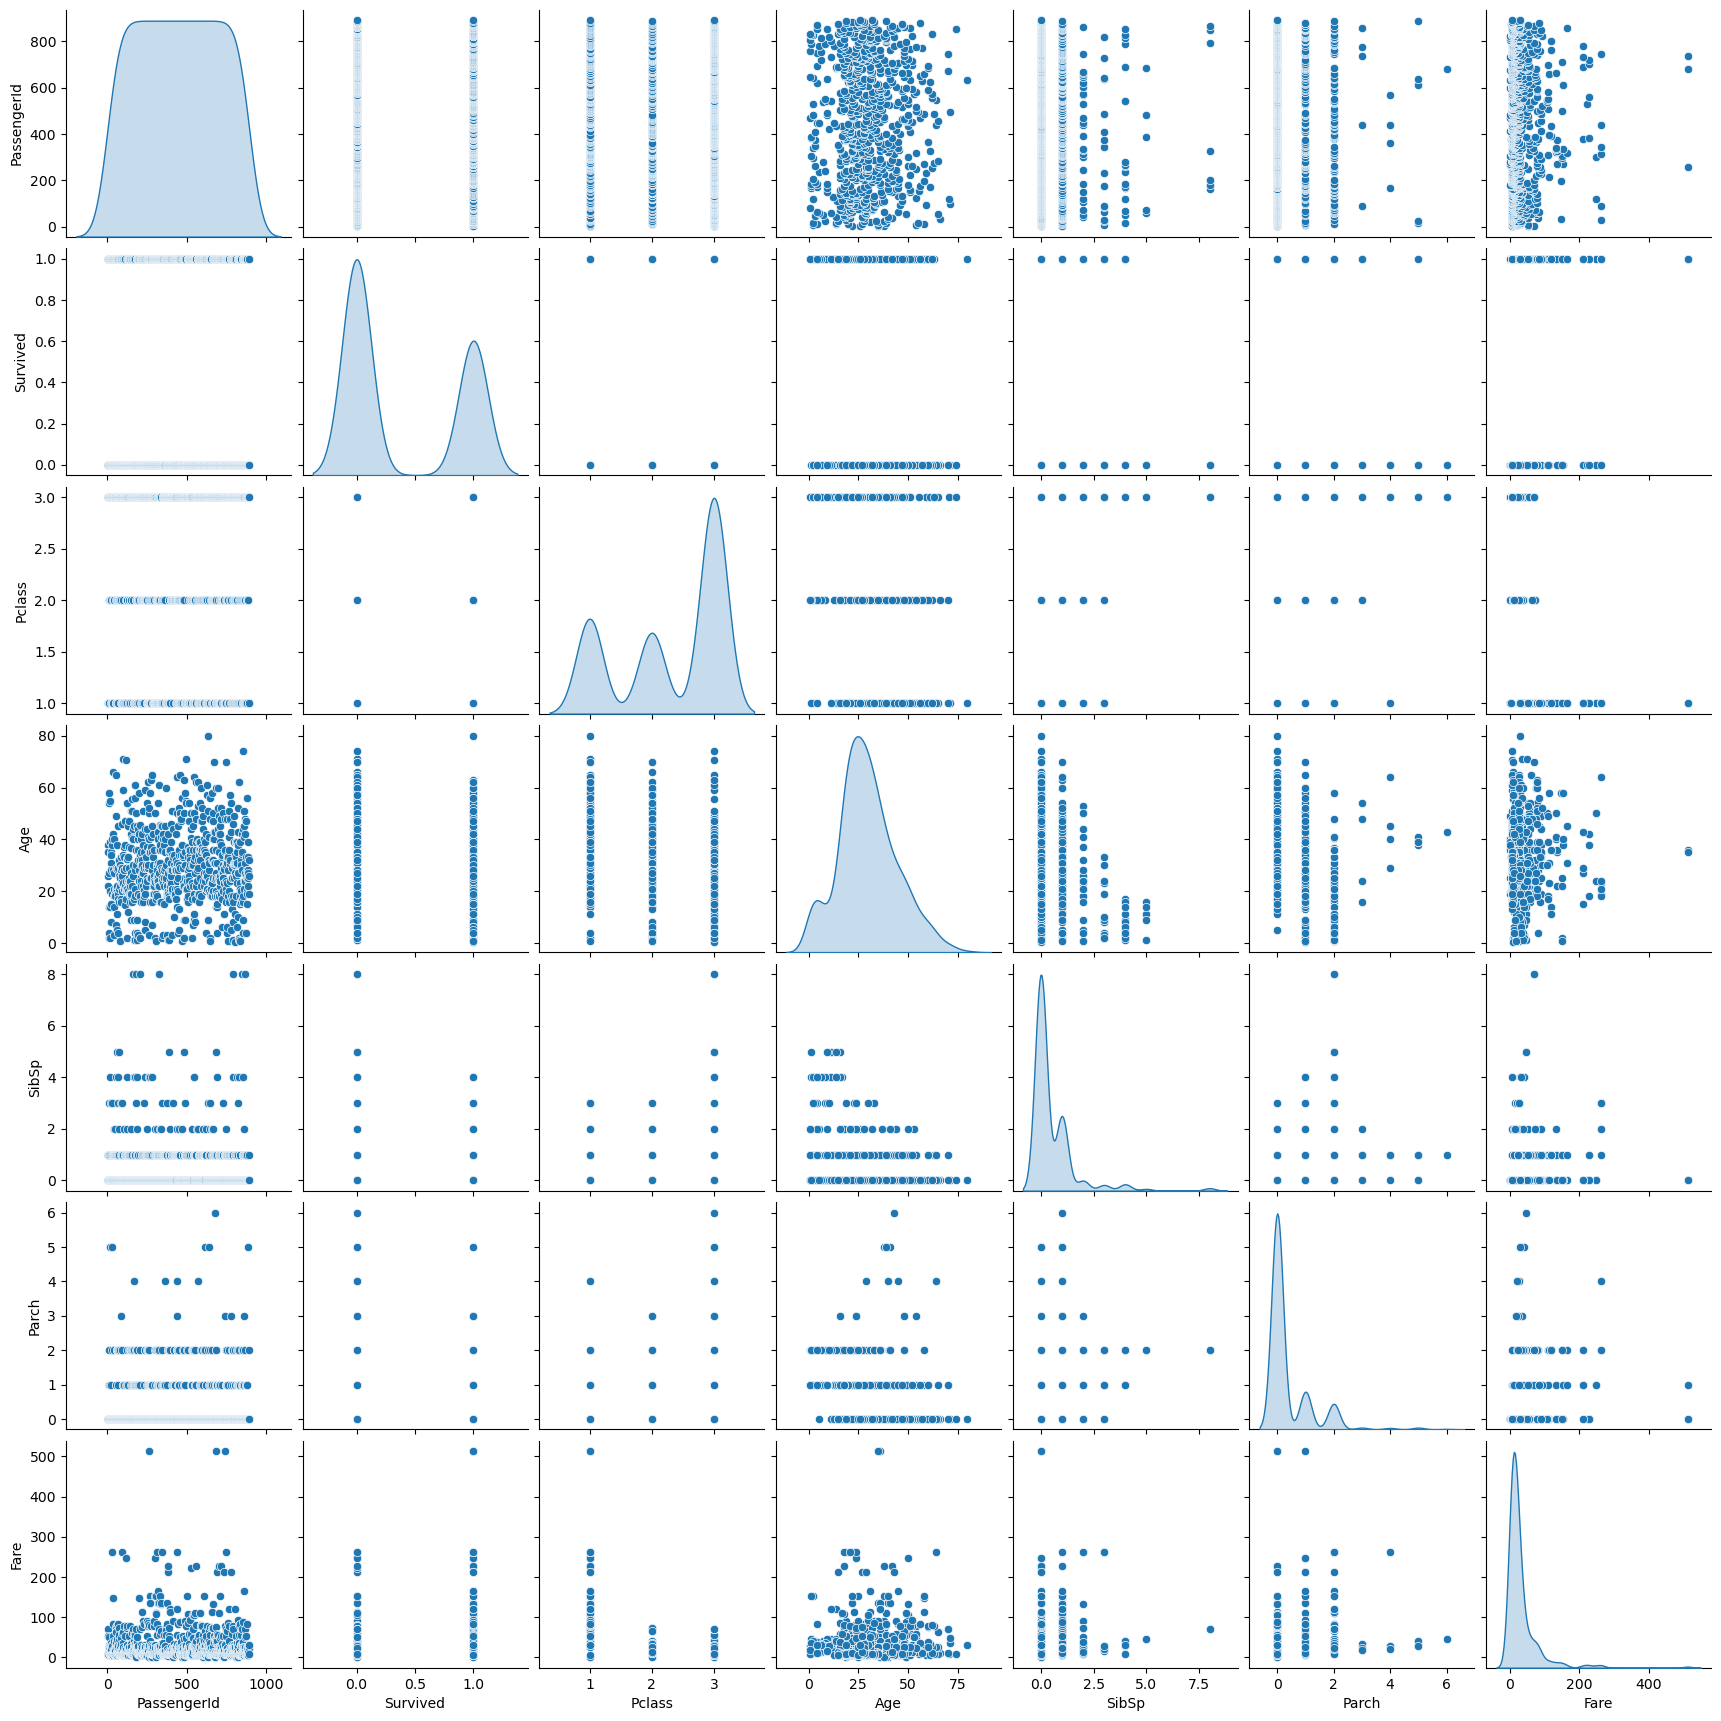

In [74]:
sns.pairplot(data, diag_kind='kde')
plt.show()

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

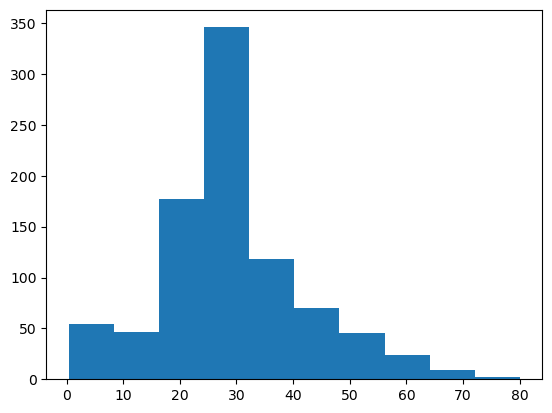

In [75]:
plt.hist(data_rellenar_media.Age)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

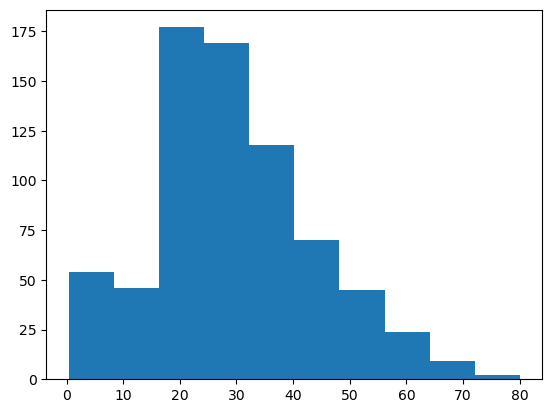

In [76]:
plt.hist(data.Age)

In [77]:
#viendo que utilizando el metodo de rellenar edades faltantes con la mediana afecta mucho el resultado, es preferible dejarlo en blanco como esta originalmente

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

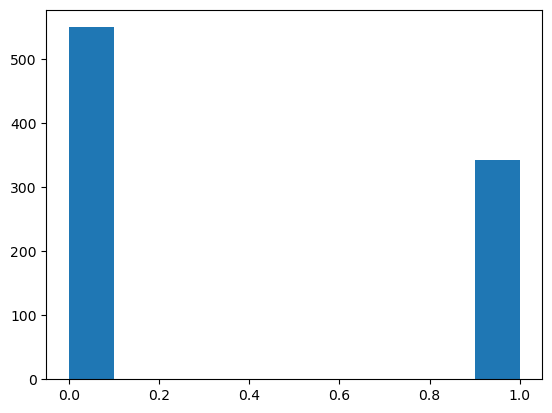

In [78]:
plt.hist(data.Survived)

In [79]:
#mas pasajeros murieron

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

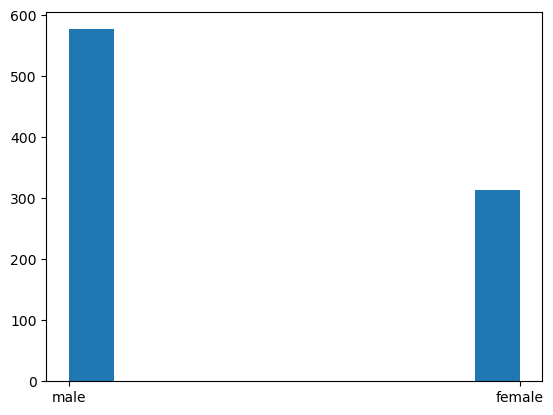

In [80]:
plt.hist(data.Sex)

In [81]:
#hay mas hombres que mujeres

In [82]:
predictors_col = ['Age', 'Sex', 'Pclass']

target_col = ['Survived']

In [83]:
predictors= data_0[predictors_col]
target= data_0 [target_col]

In [84]:
predictors

,Age,Sex,Pclass
0,22.0,1,3
1,38.0,2,1
2,26.0,2,3
3,35.0,2,1
4,35.0,1,3
...,...,...,...
886,27.0,1,2
887,19.0,2,1
888,0.0,2,3
889,26.0,1,1


In [85]:
corr=predictors.corr()
corr

,Age,Sex,Pclass
Age,1.000000,-0.024978,-0.361353
Sex,-0.024978,1.000000,-0.131900
Pclass,-0.361353,-0.131900,1.000000


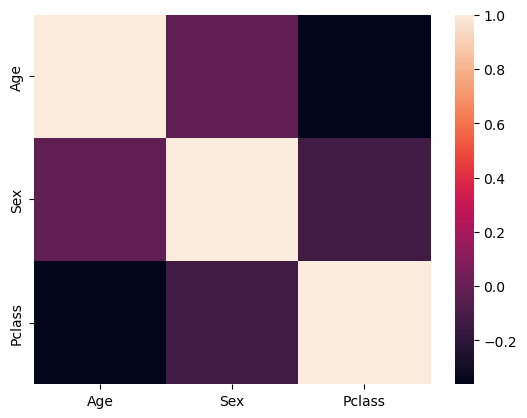

In [86]:
#mapa de calor de correlacion entre variables
sns.heatmap(corr)
plt.show()

In [87]:
#Se identifica una correlacion positiva leve pero significativa entre superviviente y su sexo

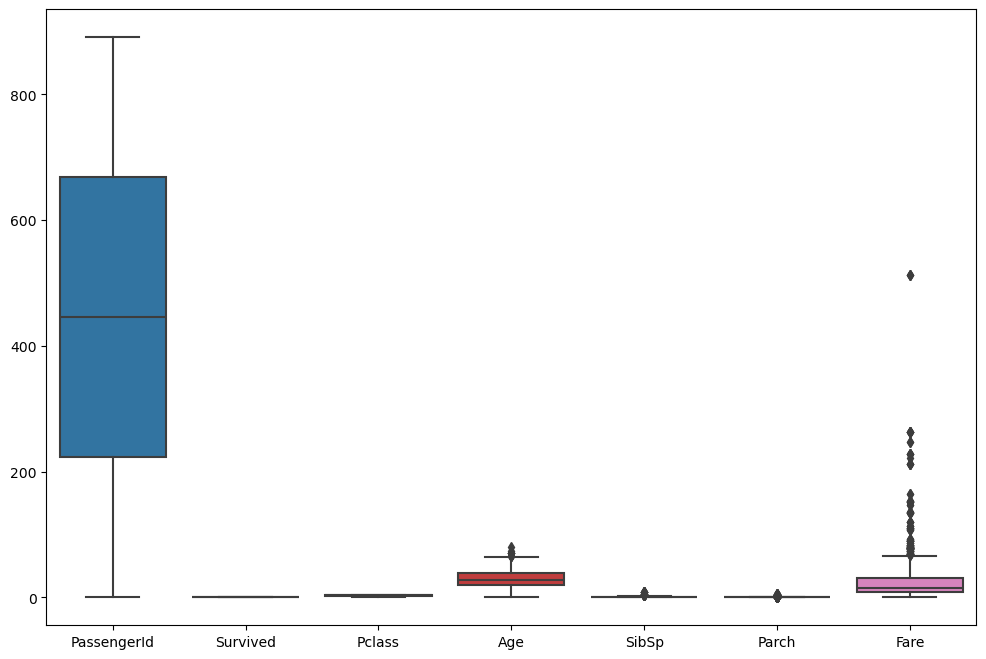

In [88]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="v")
plt.show()

In [89]:
#Se filtran solo las columnas identificadas como reelevantes
data_fil = data_0[['Age', 'Sex', 'Pclass','Survived']]

In [90]:
corr_matrix = data_fil.corr()
# Imprimir la matriz de correlación
print(corr_matrix)

               Age       Sex    Pclass  Survived
Age       1.000000 -0.024978 -0.361353  0.010539
Sex      -0.024978  1.000000 -0.131900  0.543351
Pclass   -0.361353 -0.131900  1.000000 -0.338481
Survived  0.010539  0.543351 -0.338481  1.000000


In [91]:
x_train,x_test,y_train,y_test= train_test_split(predictors, target,test_size=0.20,random_state=12)

In [92]:
tree = DecisionTreeClassifier()

In [93]:
arbol= tree.fit(x_train,y_train)

[Text(0.5374652777777778, 0.96875, 'x[1] <= 1.5\ngini = 0.466\nsamples = 712\nvalue = [449, 263]'),
 Text(0.24881944444444445, 0.90625, 'x[2] <= 1.5\ngini = 0.291\nsamples = 470\nvalue = [387, 83]'),
 Text(0.13444444444444445, 0.84375, 'x[0] <= 53.0\ngini = 0.463\nsamples = 96\nvalue = [61, 35]'),
 Text(0.06444444444444444, 0.78125, 'x[0] <= 0.46\ngini = 0.484\nsamples = 78\nvalue = [46, 32]'),
 Text(0.05555555555555555, 0.71875, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.07333333333333333, 0.71875, 'x[0] <= 17.5\ngini = 0.498\nsamples = 62\nvalue = [33, 29]'),
 Text(0.06444444444444444, 0.65625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.08222222222222222, 0.65625, 'x[0] <= 25.5\ngini = 0.49\nsamples = 58\nvalue = [33, 25]'),
 Text(0.07333333333333333, 0.59375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.09111111111111111, 0.59375, 'x[0] <= 36.5\ngini = 0.497\nsamples = 54\nvalue = [29, 25]'),
 Text(0.044444444444444446, 0.53125, 'x[0] <= 33.5\ngini = 0.4

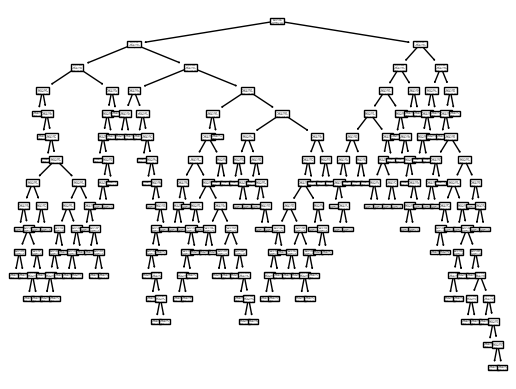

In [94]:
plot_tree(arbol)

In [95]:
predicciones = arbol.predict(x_test)

In [96]:
predicciones

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [97]:
pd.crosstab(np.array([y[0]for y in y_test.values.tolist()]),predicciones,rownames=['Actual'],colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,87,13
1,28,51


In [98]:
accuracy = accuracy_score(y_test,predicciones)
accuracy                         

0.770949720670391

In [99]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

precision = precision_score(y_test, predicciones, average='macro')  
recall = recall_score(y_test, predicciones, average='macro')  
f1 = f1_score(y_test, predicciones, average='macro')  

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.7766983695652174
Recall: 0.7577848101265823
F1-score: 0.7612945194340544
Accuracy: 0.770949720670391


In [100]:
# El arbol entrenado con los predictores edad, pClass y sexo como predictores

In [101]:
#nos da una precision de un 0.77 o en porcentajes un 77% de predecir si el pasajero sobrevivio o no valor considerable

In [110]:
filtro_hombres_sobrevivientes = data_0.loc[(data_0['Sex'] == 1) & (data_0['Survived'] == 1)]

In [111]:
filtro_hombres_sobrevivientes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",1,0.0,0,0,244373,13.0000,0,S
21,22,1,2,"Beesley, Mr. Lawrence",1,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",1,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",1,0.0,0,0,2677,7.2292,0,C
55,56,1,1,"Woolner, Mr. Hugh",1,0.0,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",1,32.0,0,0,1601,56.4958,0,S
839,840,1,1,"Marechal, Mr. Pierre",1,0.0,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",1,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",1,4.0,1,1,347742,11.1333,0,S


In [112]:
cantidad_hombres_sobrevivientes = filtro_hombres_sobrevivientes.shape[0]

In [113]:
print(f"Cantidad de hombres que han sobrevivido: {cantidad_hombres_sobrevivientes}")

Cantidad de hombres que han sobrevivido: 109


In [117]:
filtro_mujeres_sobrevivientes = data_0.loc[(data_0['Sex'] == 2) & (data_0['Survived'] == 1)]

In [118]:
filtro_mujeres_sobrevivientes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.0,1,0,237736,30.0708,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",2,28.0,1,0,P/PP 3381,24.0000,0,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",2,15.0,0,0,2667,7.2250,0,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",2,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",2,25.0,0,1,230433,26.0000,0,S


In [119]:
cantidad_mujeres_sobrevivientes = filtro_mujeres_sobrevivientes.shape[0]

In [120]:
print(f"Cantidad de mujeres que han sobrevivido: {cantidad_mujeres_sobrevivientes}")

Cantidad de mujeres que han sobrevivido: 233


In [124]:
generos = ['Hombres', 'Mujeres']
cantidad_sobrevivientes = [cantidad_hombres_sobrevivientes, cantidad_mujeres_sobrevivientes]

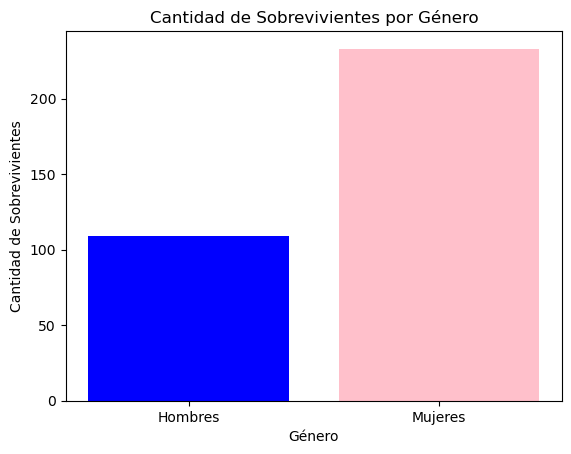

In [126]:
plt.bar(generos, cantidad_sobrevivientes, color=['blue', 'pink'])
plt.xlabel('Género')
plt.ylabel('Cantidad de Sobrevivientes')
plt.title('Cantidad de Sobrevivientes por Género')
plt.show()